In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/data_feature_engineered.csv')
df.head().T

,0,1,2,3,4
country,Germany,Germany,Germany,Germany,Germany
productgroup,SHOES,SHORTS,HARDWARE ACCESSORIES,SHOES,SHOES
category,TRAINING,TRAINING,GOLF,RUNNING,RELAX CASUAL
style,slim,regular,regular,regular,regular
gender,women,women,women,kids,women
main_color,chocolate,darkkhaki,goldenrod,rosybrown,blueviolet
sec_color,lavender,lavender,lavender,lightblue,lightblue
has_extra_sizes,1,1,1,1,1
year,2016,2016,2016,2016,2016
month,3,3,3,3,3


In [3]:
df.drop('week_number', axis=1, inplace=True)
df['month-yr'] = df['year'].astype(str) + '-' + df['month'].astype(str)

In [4]:
df.drop_duplicates(inplace=True)

# Business Conclusion

## Time Series Analysis

In [5]:
sales_time_series = df.groupby('month-yr').agg({'sales': 'sum', 'total_profit': 'sum', 'profit_margin': 'mean', 'promo1': 'sum', 'promo2': 'sum'}).reset_index()
sales_time_series['month-yr'] = pd.to_datetime(sales_time_series['month-yr'], format='%Y-%m')
sales_time_series.sort_values('month-yr', inplace=True)
sales_time_series

,month-yr,sales,total_profit,profit_margin,promo1,promo2
0,2014-12-01,78010,1919828.33,0.622643,780,0
1,2015-01-01,123075,3026680.67,0.623951,0,130
5,2015-02-01,88075,2770857.09,0.712142,0,0
6,2015-03-01,200168,4327138.52,0.571105,0,0
7,2015-04-01,280310,3779084.23,0.363660,0,0
8,2015-05-01,294670,3627422.11,0.407411,0,0
9,2015-06-01,170884,2936680.41,0.521210,0,0
10,2015-07-01,155170,4146248.61,0.652409,1560,110
11,2015-08-01,142285,4076190.81,0.697105,0,0
12,2015-09-01,190600,3258879.80,0.523029,0,0


In [6]:
def plot_time_series(data, time_col='month-yr', value_col='sales'):
    plt.figure(figsize=(16, 6))
    ax = sns.lineplot(data=data, x= time_col, y=value_col, marker='o', linewidth=2)

    # Set all monthly ticks
    ax.xaxis.set_major_locator(mdates.MonthLocator())  # one tick per month
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # e.g. Jan 2015

    # Improve readability
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Monthly {value_col} Over Time', fontsize=16, weight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel(f'{value_col}', fontsize=12)
    plt.tight_layout()
    return ax


<Axes: title={'center': 'Monthly sales Over Time'}, xlabel='Month', ylabel='sales'>

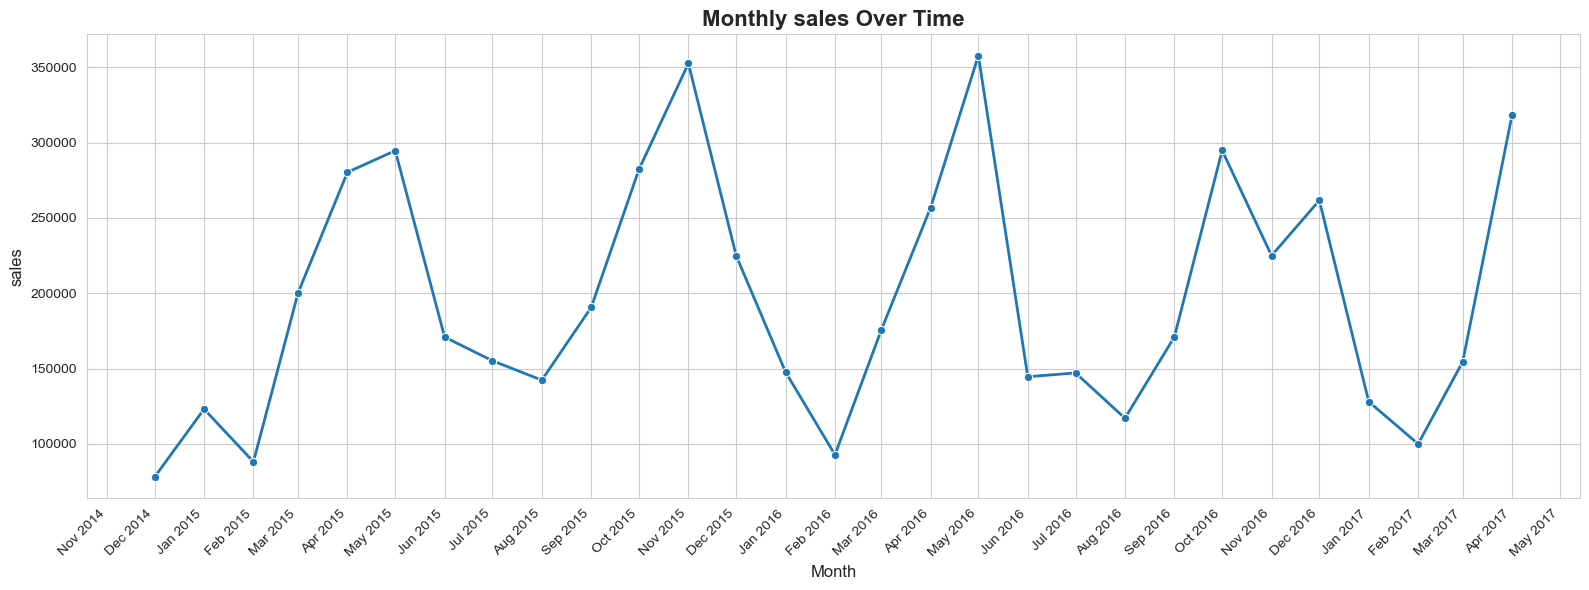

In [7]:
plot_time_series(sales_time_series, time_col='month-yr', value_col='sales')

<Axes: title={'center': 'Monthly total_profit Over Time'}, xlabel='Month', ylabel='total_profit'>

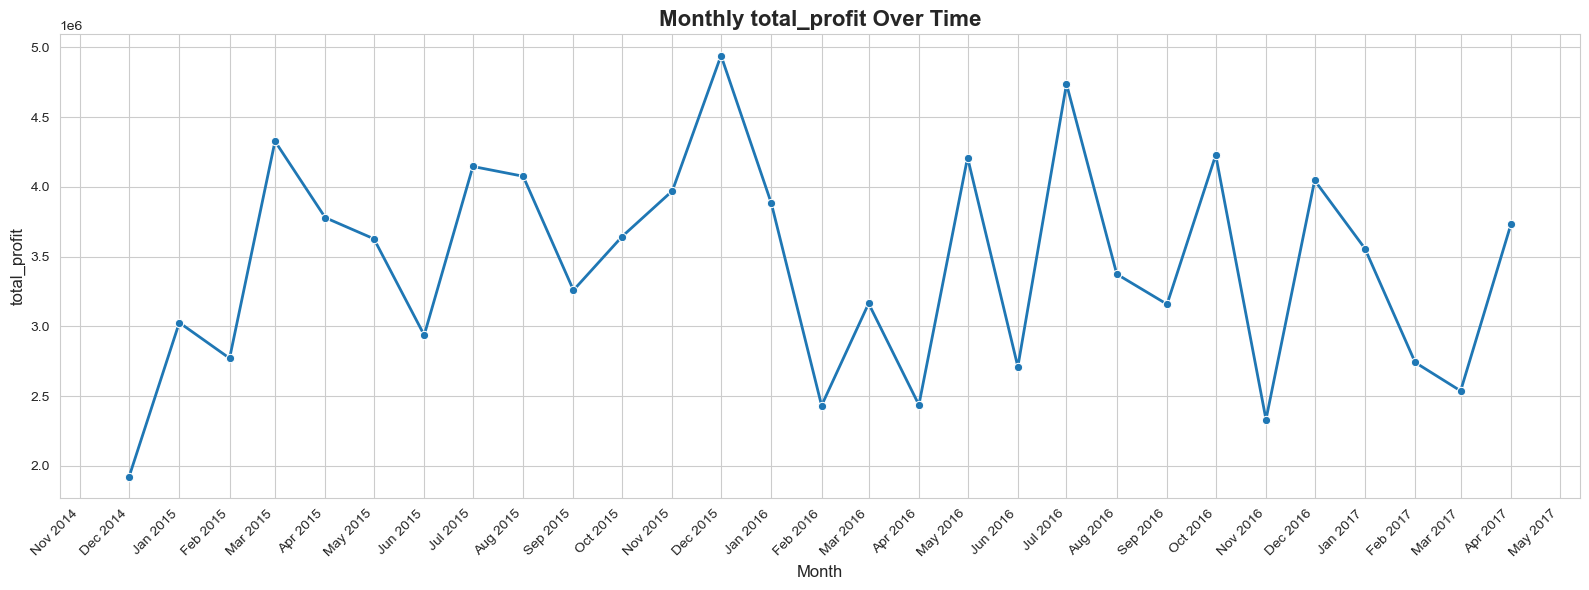

In [8]:
plot_time_series(sales_time_series, time_col='month-yr', value_col='total_profit')

<Axes: title={'center': 'Monthly profit_margin Over Time'}, xlabel='Month', ylabel='profit_margin'>

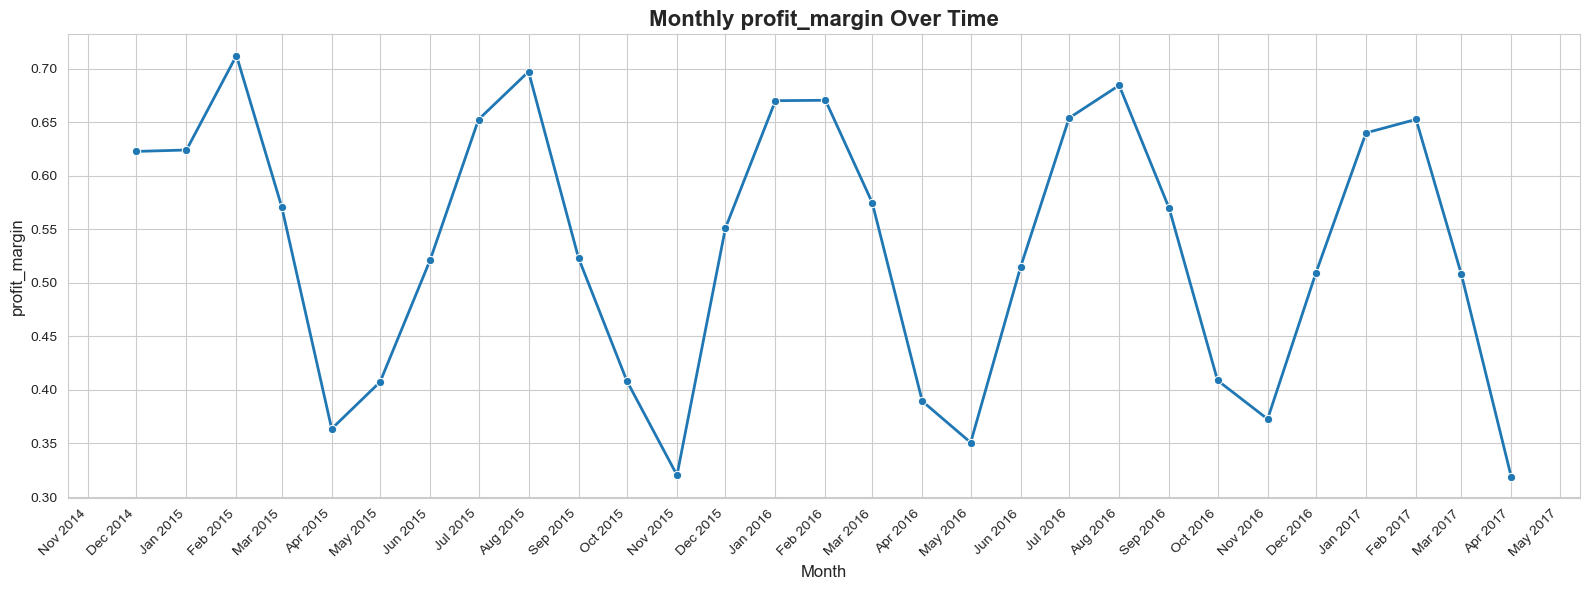

In [9]:
plot_time_series(sales_time_series, time_col='month-yr', value_col='profit_margin')

 📈 What Does the Time Series Data Reveal?

 1. ***Seasonal Trends***

**Big spikes in:**
- **November–December 2015 & 2016** → Holiday season
- **May 2016 & April 2017** → Possibly new product launches or marketing campaigns

✅ *These are ideal periods for optimizing the timing of future campaigns.*

---

 2. ***Profitability Variation***

- **Profit margin dips** when **sales peak** → Signs of **aggressive discounting** or **promo-driven volume**
- **Highest average profit margin** observed in:
  - **February 2015**
  - **February 2016**
- **Sales and Total Profit are affected with Promos spcially Promo1**

💡 *These months had smaller sales volumes but higher margins — possibly due to the absence of discount pressure.*


## Conversion Rate

In [10]:
# Total Conversion 
total_conversion = df.label.sum()
print(f"Total Conversion: {total_conversion}")

Total Conversion: 13909


In [11]:
# Overall Conversion Rate
overall_conversion_rate = df.label.mean() 
print(f"Overall Conversion Rate: {overall_conversion_rate*100: .0f} %")

Overall Conversion Rate:  14 %


In [12]:
# Conversion per month-yr
conversion_per_month = df.groupby('month-yr').agg({'label': 'mean'}).reset_index()
conversion_per_month['month-yr'] = pd.to_datetime(sales_time_series['month-yr'], format='%Y-%m')
conversion_per_month.sort_values('month-yr', inplace=True)
conversion_per_month.head()

,month-yr,label
0,2014-12-01,0.193590
1,2015-01-01,0.288116
5,2015-02-01,0.306706
6,2015-03-01,0.151719
7,2015-04-01,0.017117


In [13]:
conversion_per_month.nlargest(10, 'label')

,month-yr,label
5,2015-02-01,0.306706
11,2015-08-01,0.299647
22,2016-07-01,0.292954
13,2016-01-01,0.291567
10,2015-07-01,0.288136
1,2015-01-01,0.288116
25,2017-01-01,0.285538
23,2016-08-01,0.274205
26,2017-02-01,0.267987
17,2016-02-01,0.267427


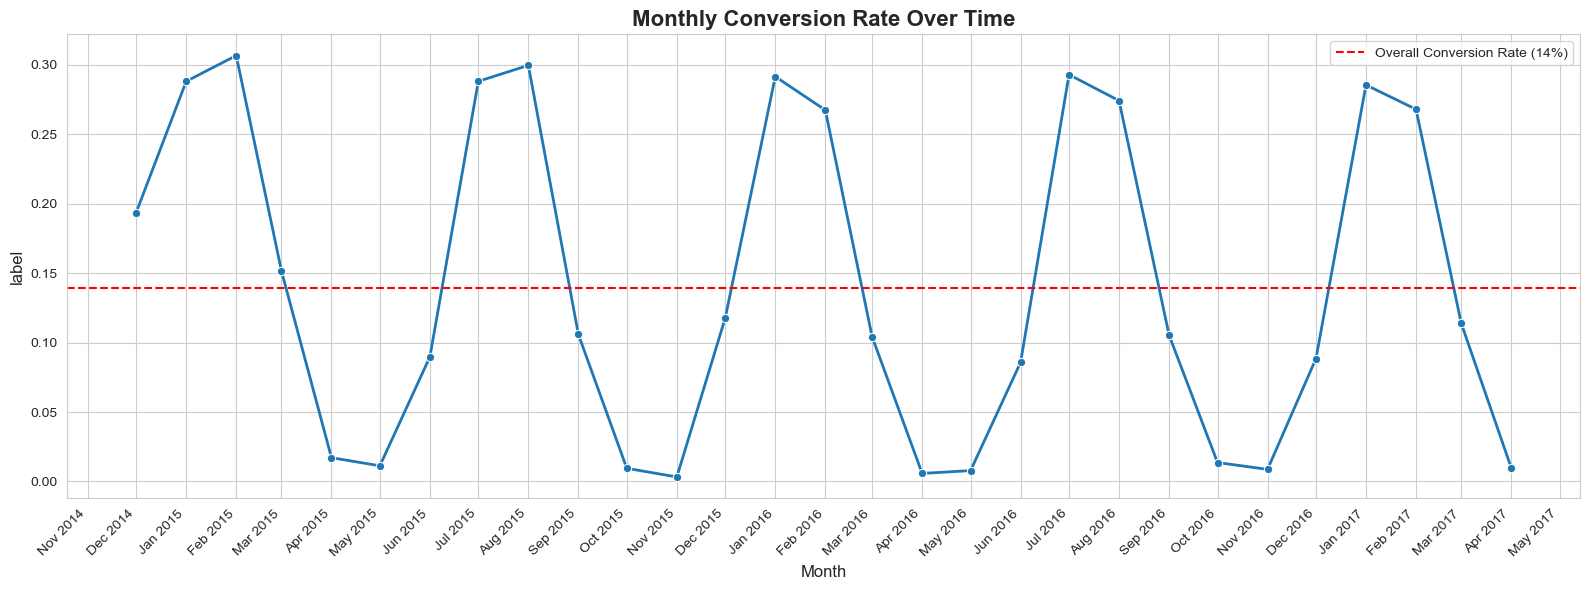

In [14]:
ax = plot_time_series(conversion_per_month, time_col='month-yr', value_col='label')

# Add horizontal line
ax.axhline(y=overall_conversion_rate, color='red', linestyle='--', label=f'Overall Conversion Rate ({overall_conversion_rate:.0%})')

# Add title
ax.set_title('Monthly Conversion Rate Over Time', fontsize=16, weight='bold')

# Add legend
ax.legend()
plt.show()

* Best Conversion Rates appear in Months: Jan, Feb, July and August

## Product Group

In [15]:
product_group_sales = df.groupby('productgroup').agg({'sales': 'sum', 'total_profit': 'sum', 'profit_margin': 'mean'})
product_group_sales

,sales,total_profit,profit_margin
productgroup,,,
HARDWARE ACCESSORIES,1135030,25640537.08,0.891594
SHOES,3405150,50407604.72,0.326742
SHORTS,567543,12369495.38,0.833881
SWEATSHIRTS,567519,11285155.25,0.695325


In [16]:
def plot_product_group_sales(product_group_sales, value_col='sales'):
    plt.figure(figsize=(16, 6))
    ax = sns.barplot(x=product_group_sales[value_col], y=product_group_sales.index, order=product_group_sales[value_col].sort_values(ascending=False).index)
    plt.title(f'Product Group {value_col}', fontsize=16, weight='bold')
    plt.xlabel(f'{value_col}', fontsize=12)
    plt.ylabel('Product Group', fontsize=12)
    plt.tight_layout()
    plt.show()

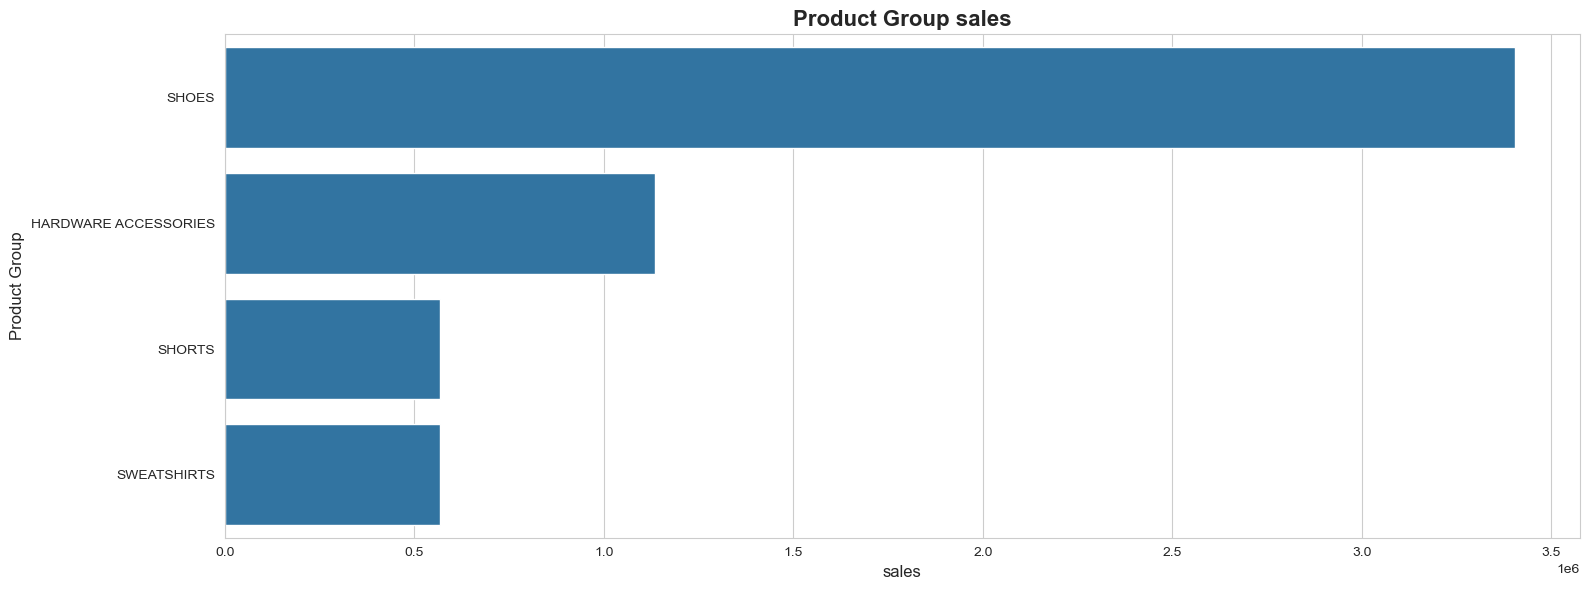

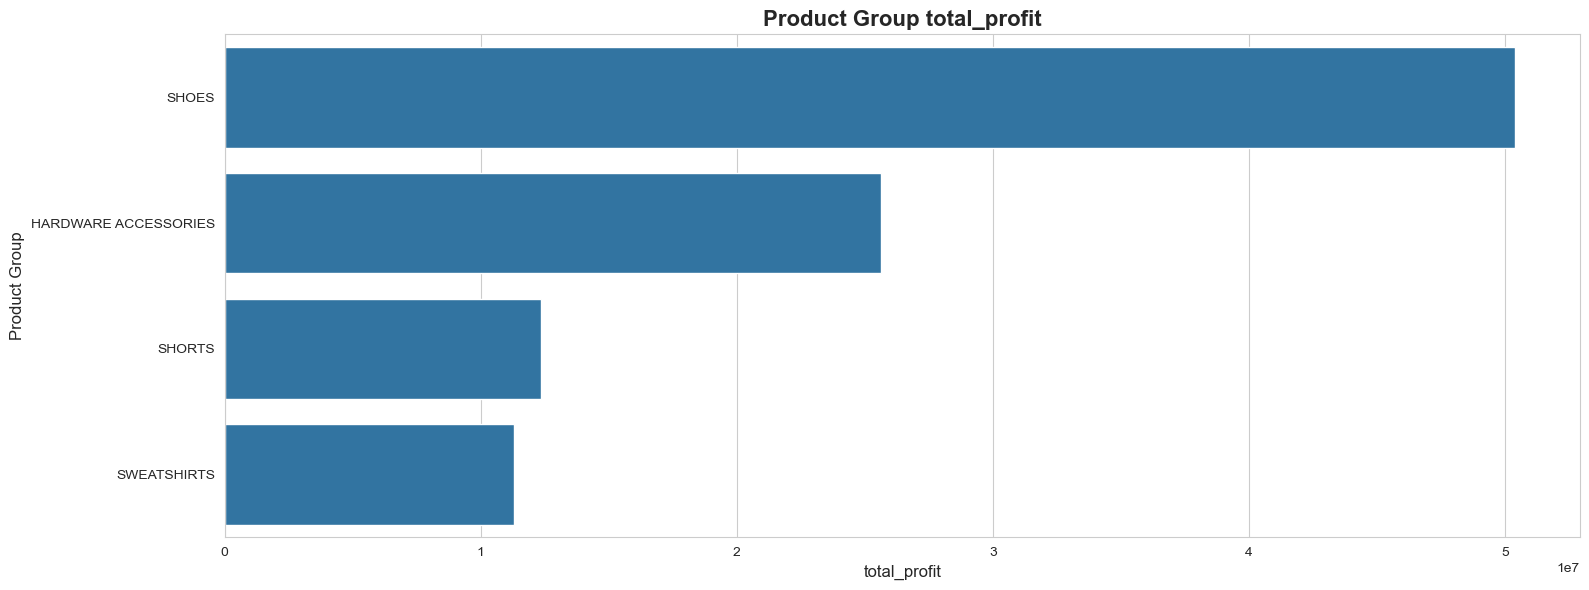

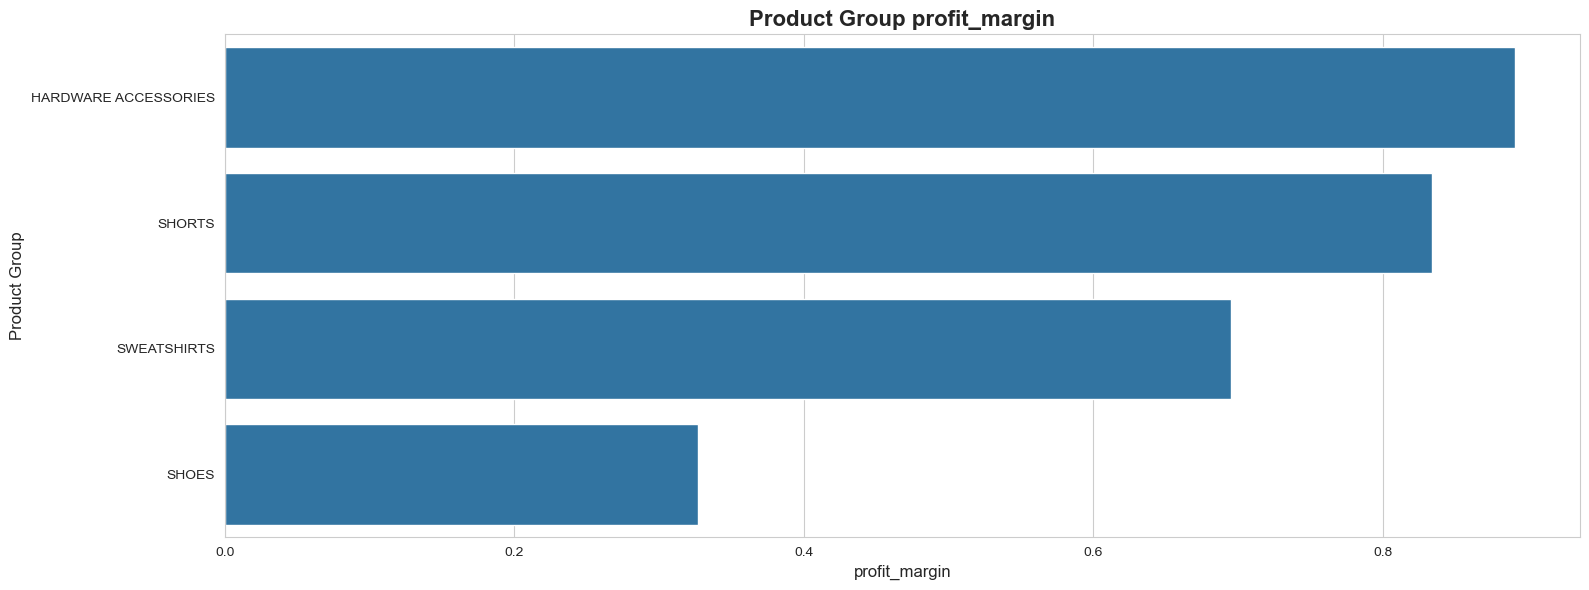

In [17]:
for value_col in ['sales', 'total_profit', 'profit_margin']: 
    plot_product_group_sales(product_group_sales, value_col=value_col)

🧾 Summary: Performance by Product Group

| Product Group           | Sales     | Total Profit | Avg. Margin |
| ----------------------- | --------- | ------------ | ----------- |
| 🧢 Hardware Accessories | 1,135,030 | \$25.6M      | **0.89** ✅  |
| 👟 Shoes                | 3,405,150 | \$50.4M      | 0.33 ❗      |
| 🩳 Shorts               | 567,543   | \$12.4M      | **0.83** ✅  |
| 👕 Sweatshirts          | 567,519   | \$11.3M      | 0.70 ✅      |


## Category

In [18]:
category_sales = df.groupby('category').agg({'sales': 'sum', 'total_profit': 'sum', 'profit_margin': 'mean'})
category_sales

,sales,total_profit,profit_margin
category,,,
FOOTBALL GENERIC,1135036,16781577.20,0.325422
GOLF,567492,12703452.00,0.876726
INDOOR,567523,10717618.25,0.622790
RELAX CASUAL,567538,8220723.30,0.303543
RUNNING,1135069,21498323.53,0.626958
TRAINING,1702584,29781098.15,0.521755


In [19]:
def plot_category_sales(category_sales, value_col='sales'):
    plt.figure(figsize=(16, 6))
    ax = sns.barplot(x=category_sales[value_col], y=category_sales.index, order=category_sales[value_col].sort_values(ascending=False).index)
    plt.title(f'Category {value_col}', fontsize=16, weight='bold')
    plt.xlabel(f'{value_col}', fontsize=12)
    plt.ylabel('Category', fontsize=12)
    plt.tight_layout()
    plt.show()

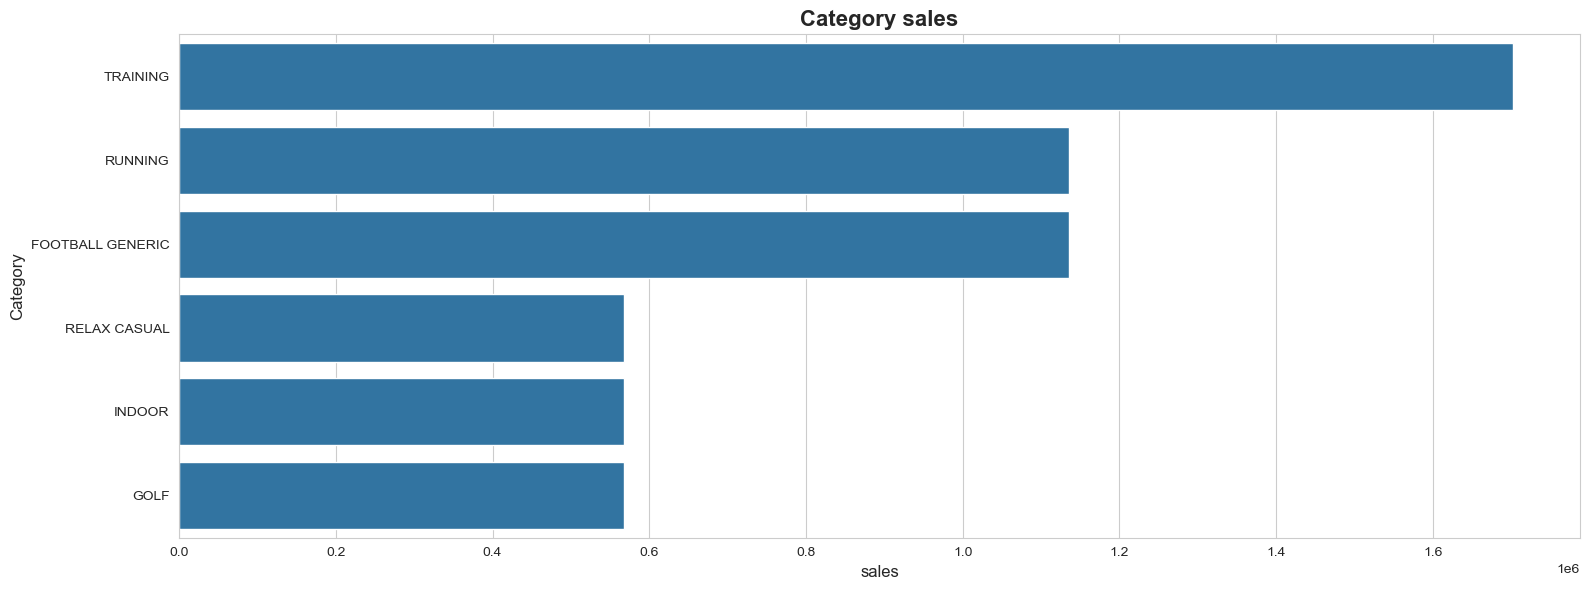

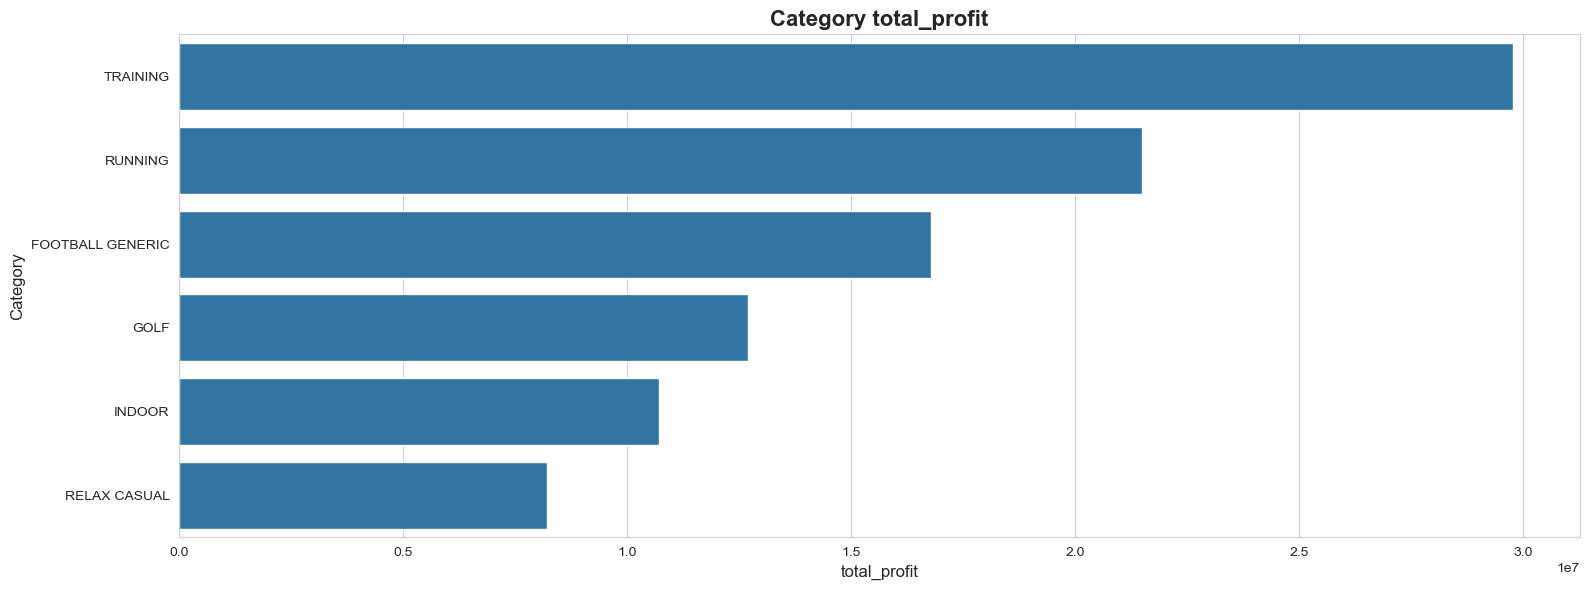

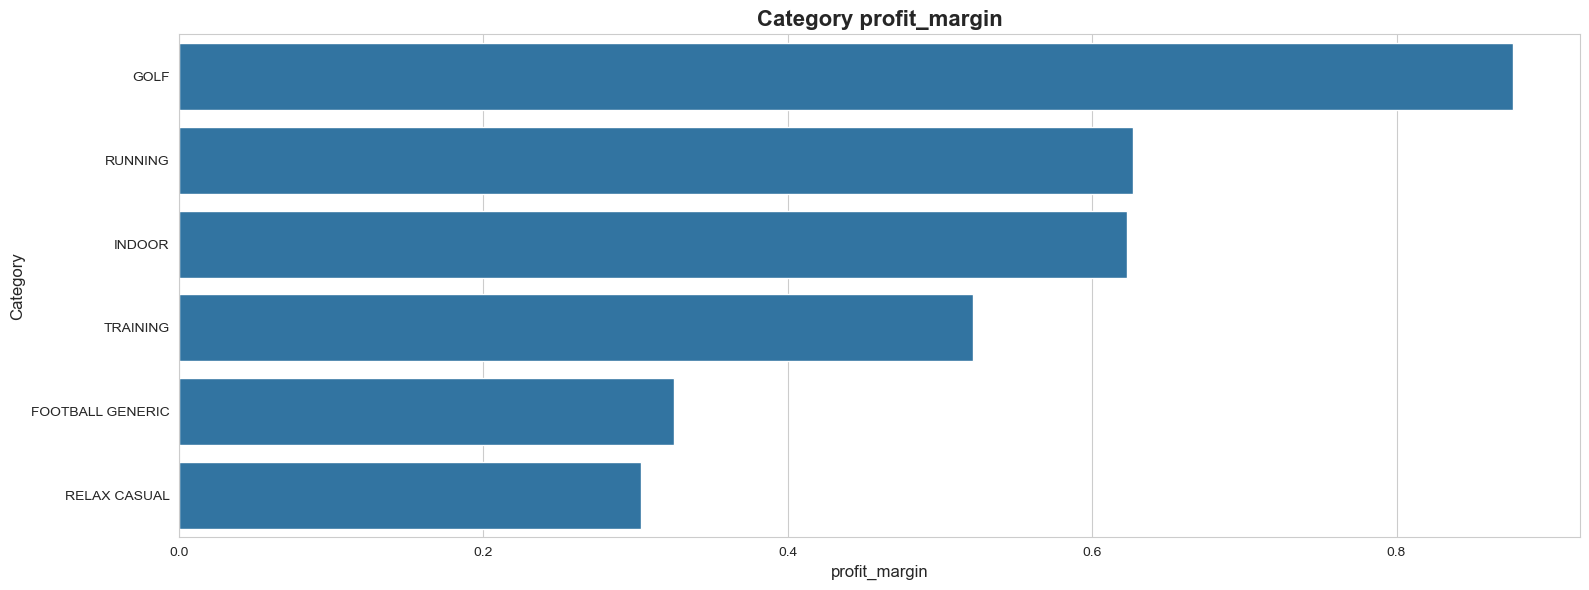

In [20]:
for value_col in ['sales', 'total_profit', 'profit_margin']:
    plot_category_sales(category_sales, value_col=value_col)

🧾 Summary: Performance by Category


| Category           | Sales     | Total Profit | Avg. Margin |
| ------------------ | --------- | ------------ | ----------- |
| ⚽ Football Generic | 1,135,036 | \$16.8M      | 0.33 ❗      |
| 🏌️ Golf           | 567,492   | \$12.7M      | **0.88** ✅  |
| 🏟️ Indoor         | 567,523   | \$10.7M      | 0.62 ✅      |
| 🧘 Relax Casual    | 567,538   | \$8.2M       | 0.30 ❗      |
| 🏃 Running         | 1,135,069 | \$21.5M      | 0.63 ✅      |
| 🏋️ Training       | 1,702,584 | \$29.8M      | 0.52 👍     |


## Country

In [21]:
country_sales = df.groupby('country').agg({'sales': 'sum', 'total_profit': 'sum', 'profit_margin': 'mean'})
country_sales

,sales,total_profit,profit_margin
country,,,
Austria,1991687,35166039.02,0.516653
France,886110,16218999.11,0.499008
Germany,2797445,48317754.30,0.543727


In [22]:
def plot_country_sales(country_sales, value_col='sales'):
    plt.figure(figsize=(16, 6))
    ax = sns.barplot(x=country_sales[value_col], y=country_sales.index, order=country_sales[value_col].sort_values(ascending=False).index)
    plt.title(f'Country {value_col}', fontsize=16, weight='bold')
    plt.xlabel(f'{value_col}', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    plt.tight_layout()
    plt.show()

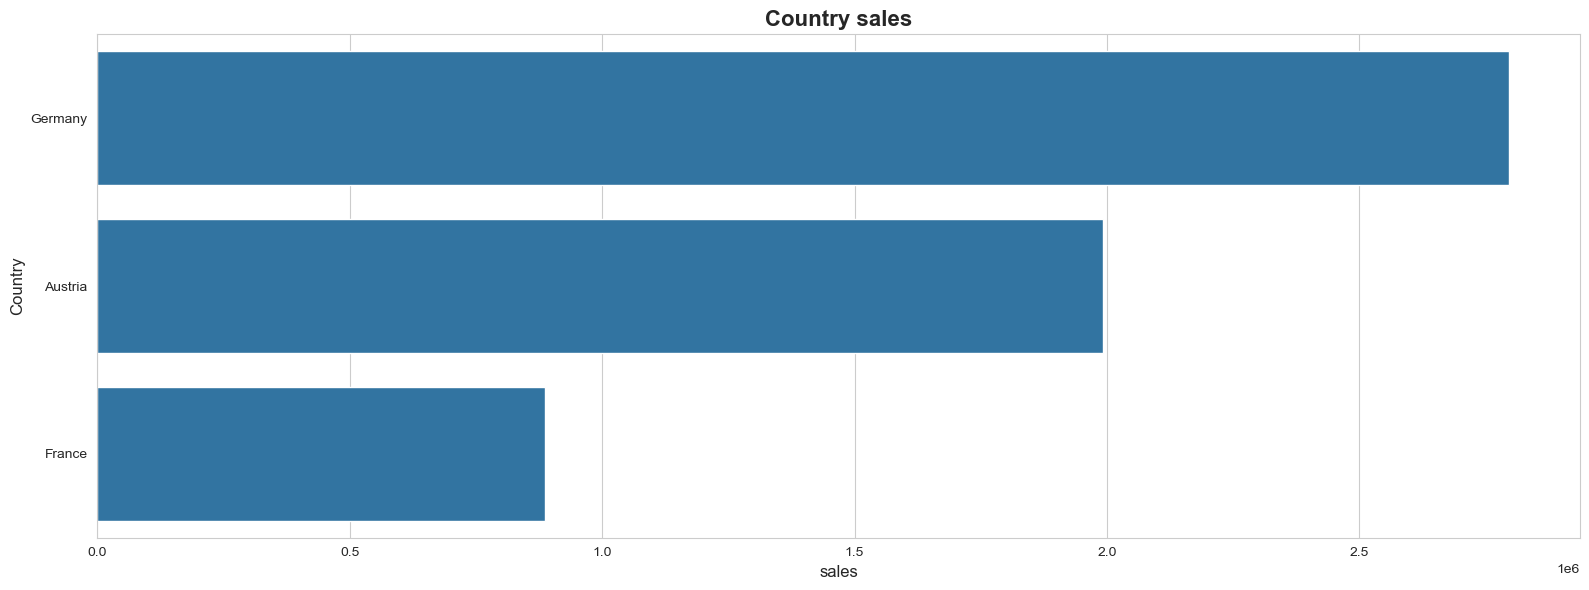

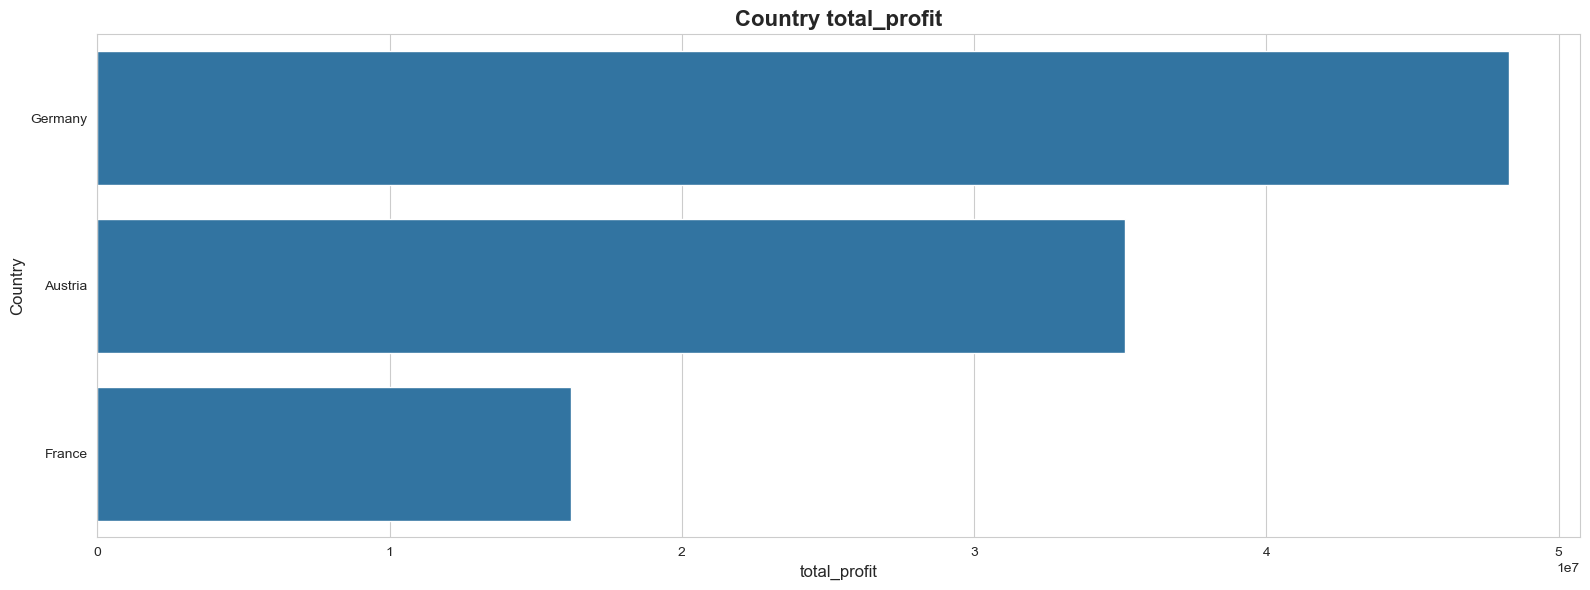

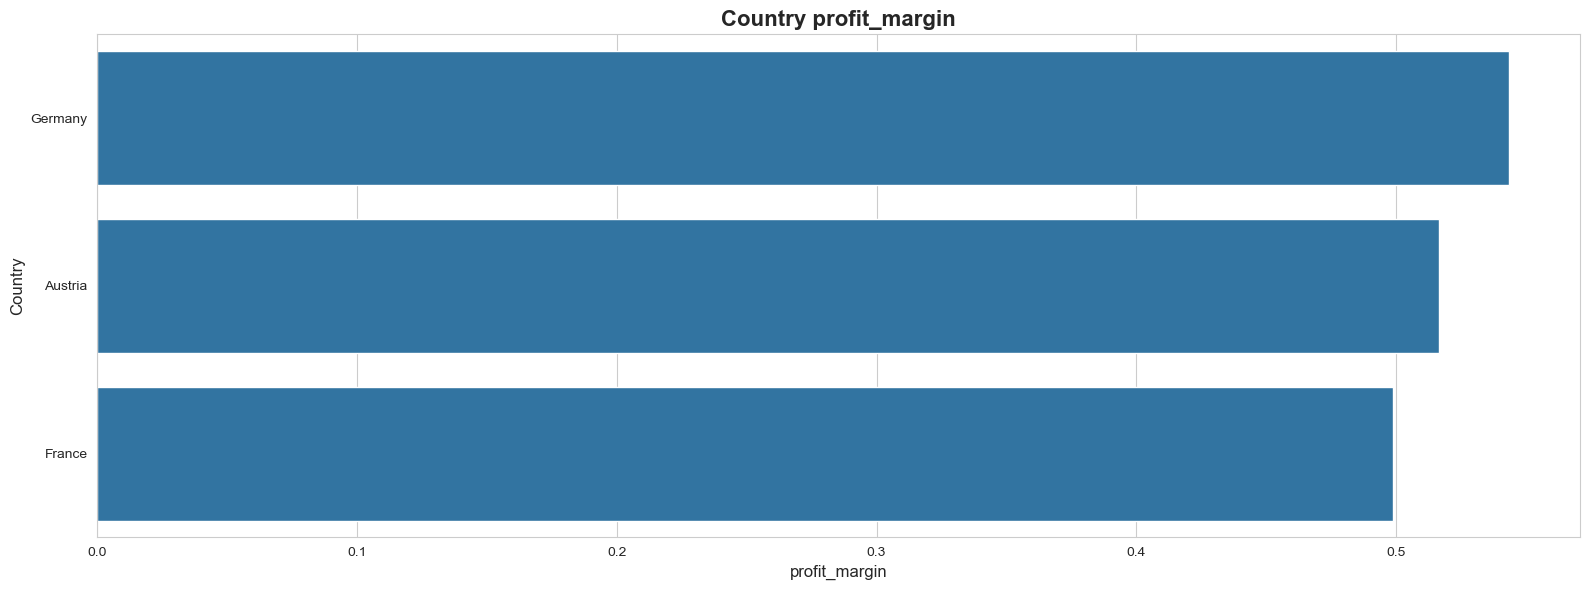

In [23]:
for value_col in ['sales', 'total_profit', 'profit_margin']:
    plot_country_sales(country_sales, value_col=value_col)

🌍 By Country

| Country      | Sales | Total Profit | Profit Margin |
| ------------ | ----- | ------------ | ------------- |
| 🇩🇪 Germany | 2.80M | \$48.3M      | 54.4% ✅       |
| 🇦🇹 Austria | 1.99M | \$35.2M      | 51.7% ✅       |
| 🇫🇷 France  | 0.89M | \$16.2M      | 49.9% 🟡      |


## Gender

In [24]:
gender_sales = df.groupby('gender').agg({'sales': 'sum', 'total_profit': 'sum', 'profit_margin': 'mean'})
gender_sales

,sales,total_profit,profit_margin
gender,,,
kids,567531,8561238.45,0.347376
men,567532,8731515.00,0.369116
unisex,567504,8050062.20,0.281742
women,3972675,74359976.78,0.610676


In [25]:
def plot_gender_sales(gender_sales, value_col='sales'):
    plt.figure(figsize=(16, 6))
    ax = sns.barplot(x=gender_sales[value_col], y=gender_sales.index, order=gender_sales[value_col].sort_values(ascending=False).index)
    plt.title(f'Gender {value_col}', fontsize=16, weight='bold')
    plt.xlabel(f'{value_col}', fontsize=12)
    plt.ylabel('Gender', fontsize=12)
    plt.tight_layout()
    plt.show()

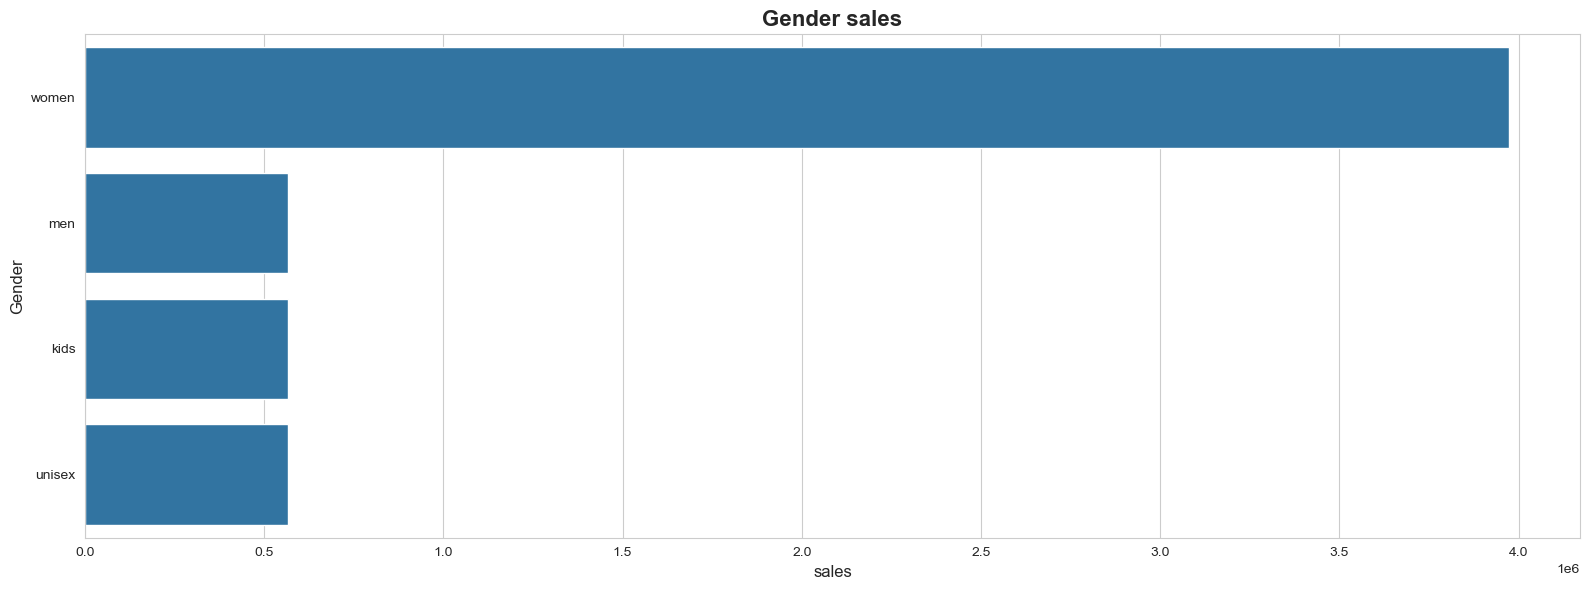

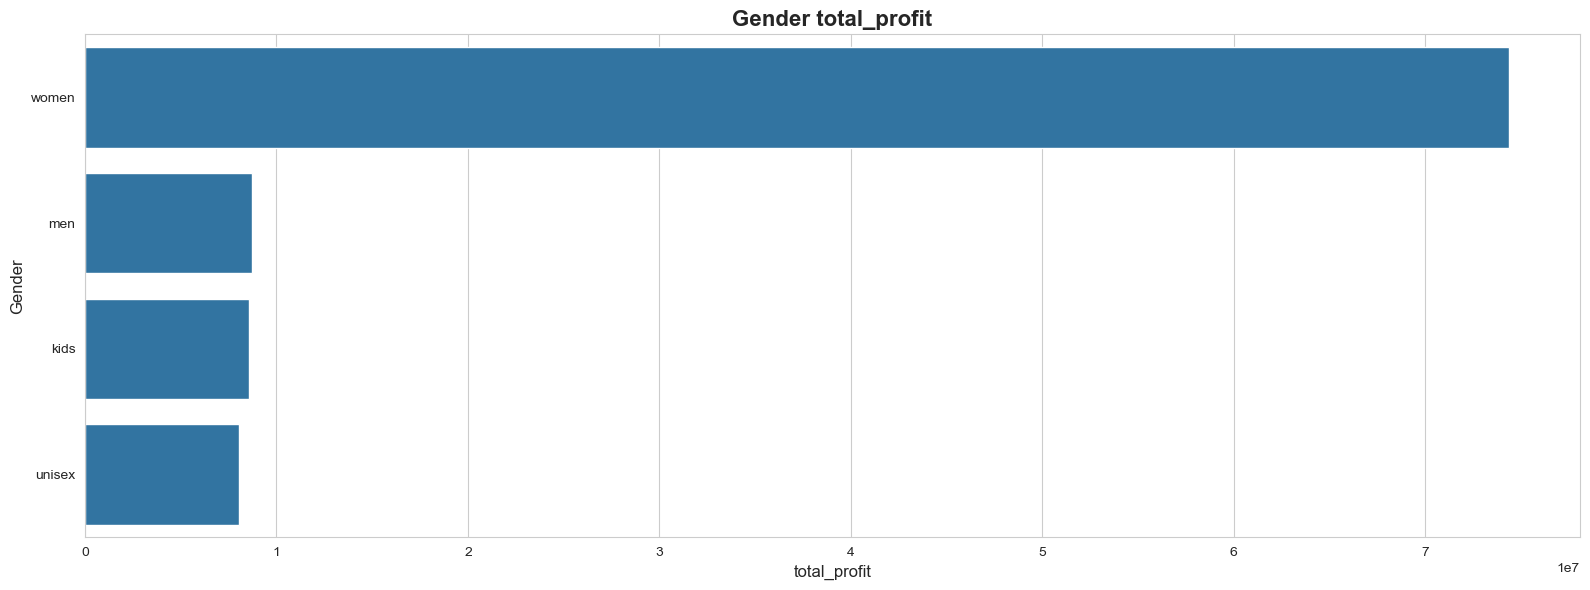

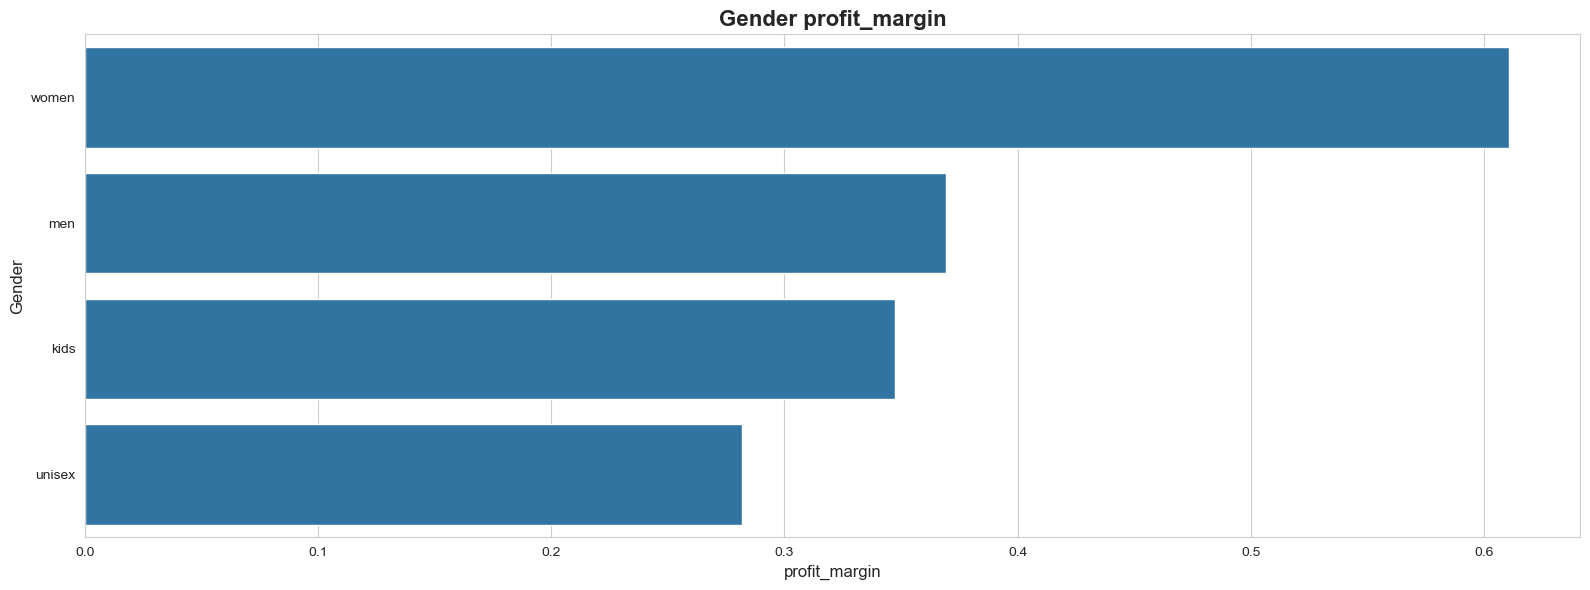

In [26]:
for value_col in ['sales', 'total_profit', 'profit_margin']:
    plot_gender_sales(gender_sales, value_col=value_col)

🚻 By Gender

| Gender    | Sales | Total Profit | Profit Margin |
| --------- | ----- | ------------ | ------------- |
| 👩 Women  | 3.97M | **\$74.4M**  | **61.1%** ✅   |
| 👨 Men    | 0.57M | \$8.73M      | 36.9% ❗       |
| 👧 Kids   | 0.57M | \$8.56M      | 34.7% ❗       |
| ⚧️ Unisex | 0.57M | \$8.05M      | 28.2% 🔻      |


✅ Germany and Women are top contributors — focus marketing and product investment here.

🔍 Unisex and Kids have low margins — may require pricing strategy review.

📉 France is underutilized — potential growth market with similar margins.

## KPIs

In [27]:
print(f"Total Conversion: {total_conversion}")

Total Conversion: 13909


In [28]:
print(f"Overall Conversion Rate: {overall_conversion_rate*100: .0f} %")

Overall Conversion Rate:  14 %


In [29]:
# Avg Discount
df['discount'] = 1 - df['ratio']
avg_discount = df.discount.mean()

print(f"Average Discount: {avg_discount*100: .2f} %")

Average Discount:  45.44 %


In [30]:
# Avg Profit Margin
avg_profit_margin = df.profit_margin.mean()

print(f"Average Profit Margin: {avg_profit_margin*100: .2f} %")

Average Profit Margin:  52.73 %


# Conclusion

🧾 Core KPIs

* 🧍 Total Conversions: 13,909 customers

* 📈 Overall Conversion Rate: 14.0%

* 💸 Average Discount Given: 45.44%

* 💰 Average Profit Margin: 52.73%



🗓️ Monthly Trends

* 📆 Highest Conversions and Sales Spikes: Nov–Dec (holiday season)

* 📉 Margin tends to drop in these months due to higher discounting

* 🔁 Best margin months: Feb–Mar (lighter discounting)

🔎 Takeaway: Plan promos for Q4, maintain price control in Q1.



🎯 Promo Effectiveness

* ✅ Promo1:

    * High usage in Jul & Dec

    * Drives large sales spikes

    * But often coincides with margin drop

* ⚠️ Promo2:

    * Rarely used

    * No clear evidence of consistent impact

🔎 Takeaway: Promo1 is effective but costly. Promo2 underutilized — test more or drop.

📦 Product Group Performance

| Product Group           | Sales | Profit  | Margin      | Notes                  |
| ----------------------- | ----- | ------- | ----------- | ---------------------- |
| 🧢 Hardware Accessories | 1.14M | \$25.6M | **89.2%** ✅ | Extremely high-margin  |
| 🩳 Shorts               | 0.57M | \$12.4M | **83.4%** ✅ | High margin            |
| 👕 Sweatshirts          | 0.57M | \$11.3M | 69.5%       | Healthy margin         |
| 👟 Shoes                | 3.41M | \$50.4M | **32.7%** ❗ | High sales, low margin |

🔎 Takeaway: Push Hardware & Shorts for margin, but Shoes dominate volume.



🌍 Country Performance

| Country      | Sales | Profit  | Margin      | Notes           |
| ------------ | ----- | ------- | ----------- | --------------- |
| 🇩🇪 Germany | 2.80M | \$48.3M | **54.4%** ✅ | Best all-around |
| 🇦🇹 Austria | 1.99M | \$35.2M | 51.7%       | Solid           |
| 🇫🇷 France  | 0.89M | \$16.2M | 49.9%       | Lowest volume   |

🔎 Takeaway: Germany is the most strategic market. France may be underpenetrated.



🚻 Gender-Based Performance

| Gender    | Sales | Profit  | Margin       | Notes                  |
| --------- | ----- | ------- | ------------ | ---------------------- |
| 👩 Women  | 3.97M | \$74.4M | **61.1%** ✅  | Highest sales + profit |
| 👨 Men    | 0.57M | \$8.7M  | 36.9%        | Low margin             |
| 👧 Kids   | 0.57M | \$8.6M  | 34.7%        | Low margin             |
| ⚧️ Unisex | 0.57M | \$8.0M  | **28.2%** 🔻 | Underperforming        |

🔎 Takeaway: Focus on women’s segment. Unisex needs review.

